In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('nba_analysis.csv')


def locate_1():
    print('Please enter your team of Five!: \n')
    
    t = True
    while t:
        a = input('Name of Point Guard: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')


def locate_2():
    
    t = True
    while t:
        b = input('Name of Shooting Guard: ')
        if b in list(df['full_name']):
            t = False
            return b
        else:
            print('\n')
            print('Name not recognized, please try again.')



def locate_3():
    
    t = True
    while t:
        a = input('Name of Small Forward: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')
            
def locate_4():
    
    t = True
    while t:
        a = input('Name of Power Forward: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')

def locate_5():
   
    t = True
    while t:
        a = input('Name of Center: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')

def team_builder():
    a = locate_1()
    b = locate_2()
    c = locate_3()
    d = locate_4()
    e = locate_5()
    return [a,b,c,d,e]

def locater(a):
    appended_data = []
    for i in a:
        new_loc = df.loc[df['full_name'] == i]
        #print(i)
        appended_data.append(new_loc)
    appended_data = pd.concat(appended_data)
    return appended_data



def forcasted(old_team):

    new = []
    #name each team temp 
    temp = old_team.copy()
    #calculate ind_team total minutes played
    temp['new_TmMP'] = temp['mpg'].sum()
    #calculate ind_team total fga
    temp['new_TmFGA'] = temp['fga'].sum()
    #calculate ind_team total fta
    temp['new_TmFTA'] = temp['fta'].sum()
    #calculate ind_team total turnover rate
    temp['new_TmTOV'] = temp['turnover'].sum()
    #calculate indiv player usage metric within ind_team... usage formula online
    temp['new_usage'] = 100 * ((temp['fga'] + 0.44 * temp['fta'] + temp['turnover']) * (temp['new_TmMP'] / 5)) / (temp['mpg'] * (temp['new_TmFGA'] + 0.44 * temp['new_TmFTA'] + temp['new_TmTOV']))


    new.append(temp)


    new = pd.concat(new)



    new['pts'] = 0.83476156 * new['new_usage'] - 5.556495932455569

    new['reb'] = 0.15413808 * new['new_usage'] + 0.9763377142292433

    new['ast'] = 0.17393668 * new['new_usage'] - 0.3528002733591336

    new['blk'] = 0.00319191 * new['new_usage'] - 0.3835123647754845

    new['stl'] = 0.02194919 * new['new_usage'] + 0.22063825643570223
    
    mer = pd.DataFrame()

    mer['full_name'] = old_team['full_name']
    
    mer['old_usage'] = old_team['usage']
    
    mer['new_usage'] = new['new_usage']

    mer['old_points'] = old_team['pts']

    mer['new_points'] = new['pts']

    mer['old_rebound'] = old_team['reb']

    mer['new_rebound'] = new['reb']

    mer['old_assist'] = old_team['ast']

    mer['new_assist'] = new['ast']

    mer['old_steal'] = old_team['stl']

    mer['new_steal'] = new['stl']

    return mer


In [ ]:
builder = team_builder()
#old team is the orginal statistics
old_team = locater(builder)
nba_prediction = forcasted(old_team)

Please enter your team of Five!: 

Name of Point Guard: Luka Donic


Name not recognized, please try again.
Name of Point Guard: Luka Doncic
Name of Shooting Guard: Klay Thompson
Name of Small Forward: Jimmy Butler
Name of Power Forward: Anthony Davis
Name of Center: Javale Mcgee


Name not recognized, please try again.
Name of Center: Javale McGee


Name not recognized, please try again.
Name of Center: Joel Embiid


In [ ]:
nba_prediction

,full_name,old_usage,new_usage,old_points,new_points,old_rebound,new_rebound,old_assist,new_assist,old_steal,new_steal
190,Luka Doncic,39.965433,25.420346,36.00,15.663431,8.75,4.894581,8.63,4.068730,1.88,0.778594
260,Klay Thompson,27.019061,18.412814,12.00,9.813813,2.30,3.814453,2.00,2.849863,0.30,0.624785
12,Jimmy Butler,24.351559,15.899680,17.20,7.715946,5.10,3.427084,4.40,2.412737,1.20,0.569623
201,Anthony Davis,25.413816,17.435988,20.13,8.998396,9.63,3.663887,2.00,2.679958,1.50,0.603344
266,Joel Embiid,34.659545,21.556298,16.30,12.437873,5.70,4.298984,2.00,3.396631,0.30,0.693782


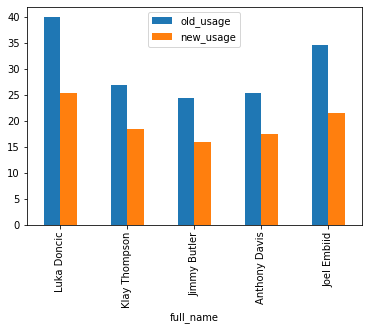

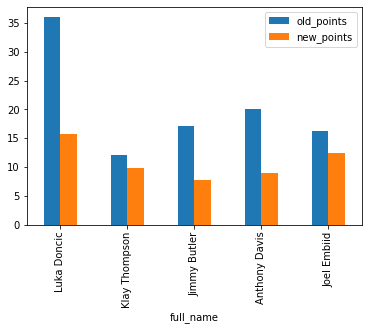

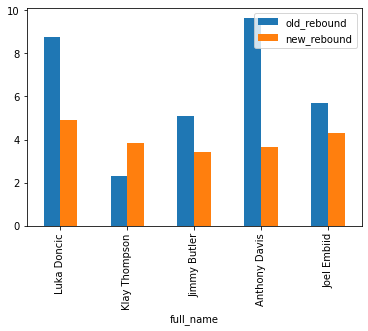

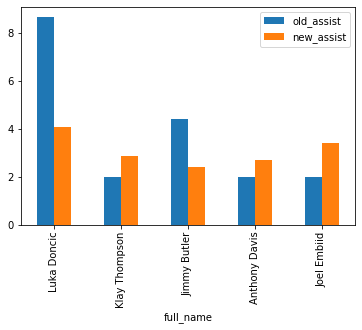

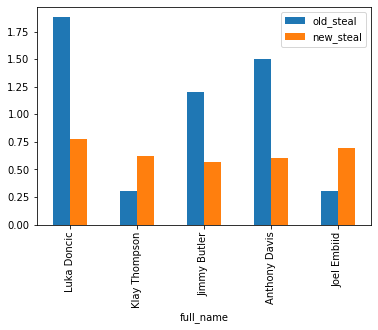

In [ ]:
usage = nba_prediction.plot(x="full_name", y=["old_usage", "new_usage"], kind="bar")
points = nba_prediction.plot(x="full_name", y=["old_points", "new_points"], kind="bar")
rebounds = nba_prediction.plot(x="full_name", y=["old_rebound", "new_rebound"], kind="bar")
assists = nba_prediction.plot(x="full_name", y=["old_assist", "new_assist"], kind="bar")
steals = nba_prediction.plot(x="full_name", y=["old_steal", "new_steal"], kind="bar")


